In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read the data as a CSV file
data1 = pd.read_csv(Path('final_df.csv'))


In [3]:
data1.head()

,PARTICIPANT_ID,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,DOB,...,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL,RACE_CAT,P_DRUG_CAT,S_DRUG_CAT,EDUC_CAT,EMPLOY_CAT
0,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,some high,full-time,No income,Bulloch,high,White,amphetamines/Meth(amphetamines),crack/cocaine,HS or less,full-time
1,01016FD1342018BDC00008,FD,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,6/13/1986,...,some high,full-time,No income,Bulloch,high,White,amphetamines/Meth(amphetamines),crack/cocaine,HS or less,full-time
2,01016FD1342018BDC00017,FD,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,12/31/1988,...,some high,unemployed,No income,Bulloch,moderate,Black,marijuana/cannabinoids,amphetamines/Meth(amphetamines),HS or less,unemployed
3,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,some high,full-time,No income,Screven,high,White,marijuana/cannabinoids,amphetamines/Meth(amphetamines),HS or less,full-time
4,01016FD1342018BDC00019,FD,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,5/29/1989,...,some high,full-time,No income,Screven,high,White,marijuana/cannabinoids,amphetamines/Meth(amphetamines),HS or less,full-time


In [7]:
unsup_model.isnull().sum()

PROGRAM_TYPE               0
GRADUATED                  0
ACCEPTANCE_DATE            0
ARREST_DATE                0
REFERRAL_DATE             87
ACCEPTANCE_TYPE            2
EXIT_DATE                  0
REFERRAL_SOURCE           51
DOB                        0
GENDER                     0
RACE                       0
EMP_UNSTABLE_CHRONIC       0
DIAGNOSIS_REASON         544
DIAGNOSIS_LEVEL          606
PRIMARY_DRUG_CHOICE        7
SECONDARY_DRUG_CHOICE      7
No_SANC_INCENT             0
No_TREATMENTS              0
No_DRUG_TEST               0
No_EMP_ASSIST              0
No_HEARING                 0
AGE                        0
DAYS_TO_ACCEPTANCE         0
EDUCATION_LEVEL           14
EMP_STATUS                 0
INCOME_LEVEL              31
RISK_LEVEL               480
RACE_CAT                   0
P_DRUG_CAT                 7
S_DRUG_CAT                 7
EDUC_CAT                  14
EMPLOY_CAT                 0
dtype: int64

In [9]:
unsup_model=unsup_model.drop(columns='ACCEPTANCE_DATE').drop(columns='ARREST_DATE').drop(columns='REFERRAL_DATE').drop(columns='EXIT_DATE').drop(columns='DOB')

In [10]:
unsup_model.isnull().sum()

PROGRAM_TYPE               0
GRADUATED                  0
ACCEPTANCE_TYPE            2
REFERRAL_SOURCE           51
GENDER                     0
RACE                       0
EMP_UNSTABLE_CHRONIC       0
DIAGNOSIS_REASON         544
DIAGNOSIS_LEVEL          606
PRIMARY_DRUG_CHOICE        7
SECONDARY_DRUG_CHOICE      7
No_SANC_INCENT             0
No_TREATMENTS              0
No_DRUG_TEST               0
No_EMP_ASSIST              0
No_HEARING                 0
AGE                        0
DAYS_TO_ACCEPTANCE         0
EDUCATION_LEVEL           14
EMP_STATUS                 0
INCOME_LEVEL              31
RISK_LEVEL               480
RACE_CAT                   0
P_DRUG_CAT                 7
S_DRUG_CAT                 7
EDUC_CAT                  14
EMPLOY_CAT                 0
dtype: int64

In [11]:
unsup_model=unsup_model.drop(columns='No_SANC_INCENT').drop(columns='EDUCATION_LEVEL')

In [12]:
unsup_model=unsup_model.drop(columns='PRIMARY_DRUG_CHOICE').drop(columns='SECONDARY_DRUG_CHOICE').drop(columns='RACE')

In [13]:
unsup_model.isnull().sum()
unsup_model_final=unsup_model.drop(columns = 'GRADUATED').drop(columns='EMP_STATUS')
unsup_model_final.isnull().sum()

PROGRAM_TYPE              0
ACCEPTANCE_TYPE           2
REFERRAL_SOURCE          51
GENDER                    0
EMP_UNSTABLE_CHRONIC      0
DIAGNOSIS_REASON        544
DIAGNOSIS_LEVEL         606
No_TREATMENTS             0
No_DRUG_TEST              0
No_EMP_ASSIST             0
No_HEARING                0
AGE                       0
DAYS_TO_ACCEPTANCE        0
INCOME_LEVEL             31
RISK_LEVEL              480
RACE_CAT                  0
P_DRUG_CAT                7
S_DRUG_CAT                7
EDUC_CAT                 14
EMPLOY_CAT                0
dtype: int64

In [14]:
dummy_df=pd.get_dummies(unsup_model_final,columns = ['PROGRAM_TYPE','ACCEPTANCE_TYPE','REFERRAL_SOURCE', 'GENDER','RACE_CAT','EMP_UNSTABLE_CHRONIC','DIAGNOSIS_REASON','DIAGNOSIS_LEVEL','INCOME_LEVEL','RISK_LEVEL','P_DRUG_CAT','S_DRUG_CAT', 'EDUC_CAT', 'EMPLOY_CAT'])
#, , 'GENDER','RACE','EMP_UNSTABLE_CHRONIC','DIAGNOSIS','DIAGNOSIS_REASON','DIAGNOSIS_LEVEL', 'PRIMARY_DRUG_CHOICE','SECONDARY_DRUG_CHOICE')

In [15]:
scaled_program_df = StandardScaler().fit_transform(dummy_df)
print(scaled_program_df [0:6])

[[-0.35639519 -0.23992639 -0.035007   -0.23263093 -0.31121183 -0.6787169
  -0.54028128  1.02554025 -0.21718055 -0.16321721 -0.08885599 -0.43101797
  -0.05864263 -0.22389403 -0.1440126   0.79870585 -0.59346546 -0.34832252
  -0.34522179 -0.87527403 -0.08601322 -0.15009384 -0.10553963 -0.06652719
  -0.18273577 -0.01564794 -0.29645037  1.72109635 -0.17471326 -0.03130738
  -0.0784706  -0.68129121  0.68244689 -0.02710966 -0.6571348  -0.19252336
  -0.13768568  0.74339867 -1.90427783 -0.28102522  2.44844094 -0.26708595
   0.63088435 -0.3046808   0.4873436  -0.19992361 -0.07188409 -0.14133305
  -0.29252354 -0.31511954 -0.33446551 -0.29693874 -0.21407226 -0.14133305
  -0.23743304 -0.095605   -0.08885599 -0.12209354  1.09968283 -0.14664712
   1.16732059 -0.03835295 -0.42139386 -0.01564794 -0.59459683 -0.18130026
  -0.117895   -0.11574187 -0.61687435  1.52264254 -0.29742657 -0.25259074
  -0.44175034 -0.19524201 -0.26761156 -0.17693283 -0.37345684 -0.34477753
   3.96759414 -0.14664712 -0.53801215 -

In [16]:
pca = PCA(n_components = 0.99)
program_pca = pca.fit_transform(scaled_program_df)
program_pca

array([[-1.99963856, -1.87352   , -1.72900849, ..., -0.20893678,
        -0.09356759,  0.32522361],
       [-2.03920851, -1.41570551, -1.64585761, ..., -0.35392975,
        -0.10323974, -0.02950588],
       [-2.82782806,  1.32495722, -0.48563232, ...,  0.07689955,
        -0.13803553,  0.21712531],
       ...,
       [ 0.71934887, -0.12748501, -0.64448933, ..., -0.35010835,
         0.60494032,  0.3413674 ],
       [-1.15670287, -0.5698228 ,  0.3920161 , ...,  0.89301234,
         0.28304389,  0.12829663],
       [-1.28740599, -0.84631038, -1.6726287 , ..., -0.40895132,
         0.46177474, -1.18474996]])

In [18]:
program_pca_df=pd.DataFrame(
                data= program_pca, columns=["pc 1", "pc 2", "pc 3", "pc 4", "pc 5", "pc 6", "pc 7", "pc 8", "pc 9", "pc 10",
                                          "pc 11", "pc 12", "pc 13", "pc 14", "pc 15", "pc 16", "pc 17", "pc 18", "pc 19", "pc 20",
                                          "pc 21", "pc 22", "pc 23", "pc 24", "pc 25", "pc 26", "pc 27", "pc 28", "pc 29", "pc 30",
                                          "pc 31", "pc 32", "pc 33", "pc 34", "pc 35", "pc 36", "pc 37", "pc 38", "pc 39", "pc 40",
                                          "pc 41", "pc 42", "pc 43", "pc 44", "pc 45", "pc 46", "pc 47", "pc 48", "pc 49", "pc 50",
                                          "pc 51", "pc 52", "pc 53", "pc 54", "pc 55", "pc 56", "pc 57", "pc 58", "pc 59", "pc 60",
                                          "pc 61", "pc 62", "pc 63", "pc 64", "pc 65", "pc 66", "pc 67", "pc 68", "pc 69", "pc 70",
                                          "pc 71", "pc 72", "pc 73", "pc 74","75"]
)
program_pca_df.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 66,pc 67,pc 68,pc 69,pc 70,pc 71,pc 72,pc 73,pc 74,75
0,-1.999639,-1.873520,-1.729008,-1.072074,-0.853062,-0.926126,-1.759671,-0.278357,-0.026446,1.234153,...,-0.351551,0.316426,0.531209,0.077666,-0.648224,-0.396155,-0.605996,-0.208937,-0.093568,0.325224
1,-2.039209,-1.415706,-1.645858,-0.598654,-0.723844,-0.957458,-1.767695,-0.229222,-0.293528,1.153342,...,-0.641276,0.192130,0.678716,0.109134,-0.477007,-0.656832,-1.038414,-0.353930,-0.103240,-0.029506
2,-2.827828,1.324957,-0.485632,-1.154499,-0.140828,-0.250929,0.841429,-0.222807,1.831589,-0.312580,...,-0.215638,-0.633797,0.278502,-0.430255,-0.502774,0.024491,0.577574,0.076900,-0.138036,0.217125
3,-1.382251,-1.493722,-0.718245,-0.707349,1.613654,0.287638,-0.352155,0.018937,1.385034,-0.468985,...,-1.000264,0.377597,-0.430435,0.128481,-0.150508,0.378028,-0.149265,0.354061,0.209505,0.613497
4,-1.427583,-1.024082,-0.645428,-0.292009,1.719467,0.183526,-0.415397,0.065223,1.085366,-0.649368,...,-1.268586,0.172556,-0.269716,0.164109,0.045544,0.064878,-0.628798,0.168227,0.214356,0.413465


In [19]:
pca.explained_variance_ratio_

array([0.05310411, 0.03654411, 0.03179771, 0.02768712, 0.02617434,
       0.02313995, 0.02296211, 0.02139532, 0.02016327, 0.01942791,
       0.01878079, 0.01771834, 0.01661053, 0.01643302, 0.0158339 ,
       0.01554896, 0.01503348, 0.01457598, 0.01420664, 0.01409999,
       0.0139171 , 0.01369428, 0.01343645, 0.01308902, 0.01305561,
       0.0128704 , 0.01273362, 0.01269556, 0.01245266, 0.01237691,
       0.01222049, 0.01211118, 0.01192509, 0.01185142, 0.01179895,
       0.01175687, 0.01149167, 0.01138496, 0.01133918, 0.01127855,
       0.01122517, 0.01111246, 0.01106831, 0.0109107 , 0.01085208,
       0.01074374, 0.01065895, 0.01055901, 0.01046964, 0.01033064,
       0.01022016, 0.01009439, 0.01007358, 0.00985851, 0.00974798,
       0.00948532, 0.009323  , 0.00927475, 0.00903862, 0.00879392,
       0.00871139, 0.008418  , 0.00831764, 0.0080656 , 0.0078929 ,
       0.00739319, 0.00704673, 0.0068951 , 0.00623212, 0.00577789,
       0.00557141, 0.00545268, 0.004792  , 0.0042088 , 0.00376

In [20]:
# Create a new dataframe for t-SNE
tsne_df = program_pca_df

In [21]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [22]:
#reduce dimensions using tsne
tsne_features = tsne.fit_transform(tsne_df)
tsne_features.shape

(4085, 2)

In [23]:
# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

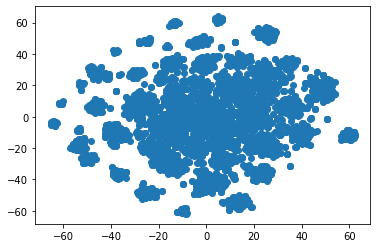

In [24]:
# Visualize the clusters
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

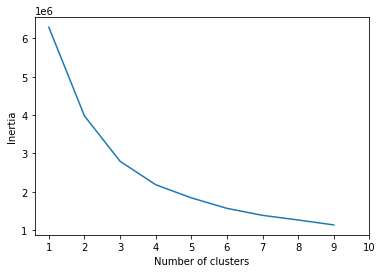

In [25]:
#Determine appropriate number of clusters for K-Means model
inertia = []
# Same as k = list(range(1, 10))
k = [1,2,3,4,5,6,7,8,9]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Initializing model with K = 4 based on elbow of inertia graph
model = KMeans(n_clusters=2, random_state=42)

In [27]:
model.fit(tsne_df)

KMeans(n_clusters=2, random_state=42)

In [28]:
predictions = model.predict(tsne_df)
print(predictions)

[0 0 0 ... 0 1 0]


In [29]:
tsne_df["class"]=model.labels_
tsne_df.head(10)

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 69,pc 70,pc 71,pc 72,pc 73,pc 74,75,x,y,class
0,-1.999639,-1.873520,-1.729008,-1.072074,-0.853062,-0.926126,-1.759671,-0.278357,-0.026446,1.234153,...,0.077666,-0.648224,-0.396155,-0.605996,-0.208937,-0.093568,0.325224,-4.169524,-14.153003,0
1,-2.039209,-1.415706,-1.645858,-0.598654,-0.723844,-0.957458,-1.767695,-0.229222,-0.293528,1.153342,...,0.109134,-0.477007,-0.656832,-1.038414,-0.353930,-0.103240,-0.029506,-4.197392,-14.139603,0
2,-2.827828,1.324957,-0.485632,-1.154499,-0.140828,-0.250929,0.841429,-0.222807,1.831589,-0.312580,...,-0.430255,-0.502774,0.024491,0.577574,0.076900,-0.138036,0.217125,-5.994722,-22.843414,0
3,-1.382251,-1.493722,-0.718245,-0.707349,1.613654,0.287638,-0.352155,0.018937,1.385034,-0.468985,...,0.128481,-0.150508,0.378028,-0.149265,0.354061,0.209505,0.613497,-2.988800,-21.263214,0
4,-1.427583,-1.024082,-0.645428,-0.292009,1.719467,0.183526,-0.415397,0.065223,1.085366,-0.649368,...,0.164109,0.045544,0.064878,-0.628798,0.168227,0.214356,0.413465,-2.913741,-21.401688,0
5,-0.987675,-1.442498,-1.087973,-0.514664,1.383706,-0.305047,0.038675,-0.531413,0.714862,-0.687125,...,1.016150,1.038934,0.311960,0.393624,0.243974,0.129691,0.565886,-2.826681,-12.264320,0
6,-1.033830,-0.971169,-1.016632,-0.107621,1.486176,-0.419556,-0.032455,-0.485534,0.410538,-0.881733,...,1.052372,1.238534,-0.008687,-0.092639,0.052306,0.136616,0.387953,-2.818565,-12.311069,0
7,0.582601,-1.296783,-0.142298,-0.233072,2.637979,-0.142647,-0.867924,0.026371,1.238249,-0.026679,...,0.879038,0.686639,0.233214,0.352415,0.074693,0.166742,0.070131,-63.514133,-4.338343,0
8,-2.187946,-1.897339,-0.169436,0.093815,-1.255329,0.249839,-0.386680,-1.213055,-1.608738,0.558601,...,-0.336205,0.428512,-0.039568,0.523845,-0.262268,-0.253391,0.610680,-12.294072,-12.843240,0
9,0.369645,-0.409426,0.202019,0.278240,1.598284,-1.159222,0.751697,-2.930902,0.330493,-1.401459,...,0.557006,-0.861266,-0.161639,-0.315606,-0.086128,0.431374,0.345478,13.437032,-5.191214,1


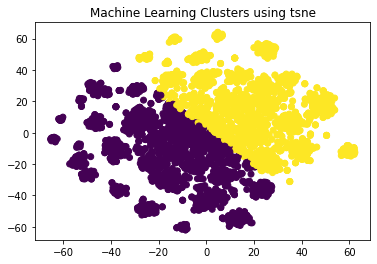

In [30]:
#Group t-sne dataset visualization into clusters
plt.scatter(x=tsne_df['x'], y=tsne_df['y'], c=tsne_df['class'])

plt.title("Machine Learning Clusters using tsne")
plt.savefig('clusters.png')
plt.show()


In [31]:
unsup_model['class']=tsne_df['class']
unsup_model.head(5)

,PROGRAM_TYPE,GRADUATED,ACCEPTANCE_TYPE,REFERRAL_SOURCE,GENDER,EMP_UNSTABLE_CHRONIC,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,No_TREATMENTS,No_DRUG_TEST,...,DAYS_TO_ACCEPTANCE,EMP_STATUS,INCOME_LEVEL,RISK_LEVEL,RACE_CAT,P_DRUG_CAT,S_DRUG_CAT,EDUC_CAT,EMPLOY_CAT,class
0,FD,1,post adjudication,prosecutor,male,yes,substance-induced/related,Primary,1,1,...,5,full-time,No income,high,White,amphetamines/Meth(amphetamines),crack/cocaine,HS or less,full-time,0
1,FD,1,post adjudication,prosecutor,male,yes,substance-induced/related,NaN,0,21,...,5,full-time,No income,high,White,amphetamines/Meth(amphetamines),crack/cocaine,HS or less,full-time,0
2,FD,1,probation revocation,defense attorney,female,yes,substance-induced/related,Primary,1,5,...,75,unemployed,No income,moderate,Black,marijuana/cannabinoids,amphetamines/Meth(amphetamines),HS or less,unemployed,0
3,FD,1,post adjudication,defense attorney,male,no,substance-induced/related,Primary,1,0,...,157,full-time,No income,high,White,marijuana/cannabinoids,amphetamines/Meth(amphetamines),HS or less,full-time,0
4,FD,1,post adjudication,defense attorney,male,no,substance-induced/related,NaN,0,6,...,157,full-time,No income,high,White,marijuana/cannabinoids,amphetamines/Meth(amphetamines),HS or less,full-time,0


In [32]:
classes=unsup_model.groupby(['class'])
classes.describe()

GRADUATED                                              No_TREATMENTS  \
          count      mean       std  min  25%  50%  75%  max         count   
class                                                                        
0        2165.0  0.527021  0.499385  0.0  0.0  1.0  1.0  1.0        2165.0   
1        1920.0  0.723437  0.447415  0.0  0.0  1.0  1.0  1.0        1920.0   

                 ...        AGE            DAYS_TO_ACCEPTANCE              \
           mean  ...        75%        max              count        mean   
class            ...                                                        
0      5.875289  ...  43.430967  75.619879             2165.0  215.369515   
1      6.843750  ...  50.079838  81.081891             1920.0  323.668750   

                                                      
              std  min   25%    50%     75%      max  
class                                                 
0      297.471372  1.0  60.0  111.0  240.00   3667.0  
1      457.645141  1.0  82.0  188.0  418.25  10141.0  

[2 rows x 56 columns]

In [33]:
#unsup_model.to_csv('classes_df')
unsup_model.to_excel(r'C:\Users\matthew.bishop\Homework\Project 4\two_clusters.xlsx', index = False)

In [34]:
#classes['GRADUATED','DAYS_TO_ACCEPTANCE','AGE','RISK_LEVEL'].describe().reset_index()
risk=unsup_model.groupby(['RISK_LEVEL'])
risk.describe()

GRADUATED                                               \
                        count      mean       std  min  25%  50%  75%  max   
RISK_LEVEL                                                                   
high                   1729.0  0.542510  0.498334  0.0  0.0  1.0  1.0  1.0   
high risk/high need       6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
low                     616.0  0.761364  0.426596  0.0  1.0  1.0  1.0  1.0   
low risk/low need         1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
moderate               1067.0  0.690722  0.462413  0.0  0.0  1.0  1.0  1.0   
very high               130.0  0.207692  0.407225  0.0  0.0  0.0  0.0  1.0   
very low                 56.0  0.500000  0.504525  0.0  0.0  0.5  1.0  1.0   

                    No_TREATMENTS             ... DAYS_TO_ACCEPTANCE           \
                            count       mean  ...                75%      max   
RISK_LEVEL                                    ...                               
high                       1729.0   6.846732  ...             260.00  10141.0   
high risk/high need           6.0  10.500000  ...             526.25    625.0   
low                         616.0   5.201299  ...             440.75   3247.0   
low risk/low need             1.0   0.000000  ...             119.00    119.0   
moderate                   1067.0   6.232427  ...             364.00   3167.0   
very high                   130.0   8.184615  ...             244.25   1929.0   
very low                     56.0   8.535714  ...             209.25   1029.0   

                      class                                               
                      count      mean       std  min  25%  50%  75%  max  
RISK_LEVEL                                                                
high                 1729.0  0.377675  0.484946  0.0  0.0  0.0  1.0  1.0  
high risk/high need     6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
low                   616.0  0.732143  0.443203  0.0  0.0  1.0  1.0  1.0  
low risk/low need       1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
moderate             1067.0  0.572634  0.494928  0.0  0.0  1.0  1.0  1.0  
very high             130.0  0.061538  0.241245  0.0  0.0  0.0  0.0  1.0  
very low               56.0  0.089286  0.287736  0.0  0.0  0.0  0.0  1.0  

[7 rows x 64 columns]

TypeError: 'value' must be an instance of str or bytes, not a float

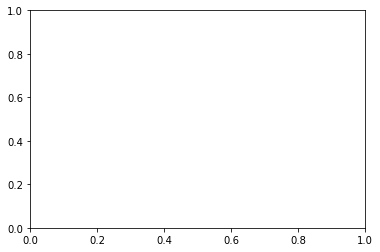

In [35]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model['RISK_LEVEL'], c=unsup_model['class'])

plt.show()


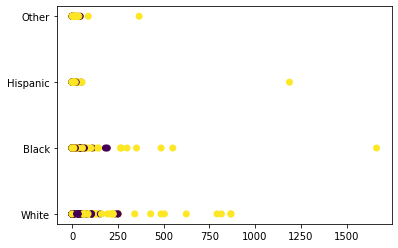

In [36]:
#Group t-sne dataset visualization into clusters
plt.scatter(x=unsup_model['No_DRUG_TEST'], y=unsup_model['RACE_CAT'], c=unsup_model['class'])

plt.show()

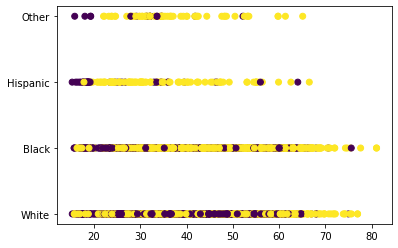

In [37]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model['RACE_CAT'], c=tsne_df['class'])

plt.show()

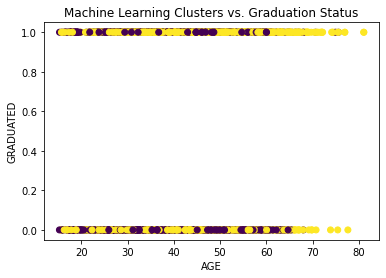

In [47]:
plt.scatter(x=unsup_model['AGE'], y=(unsup_model["GRADUATED"]), c=tsne_df['class'])

plt.title("Machine Learning Clusters vs. Graduation Status")
plt.xlabel('AGE')
plt.ylabel('GRADUATED')
plt.savefig('graduation_clusters2.png')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

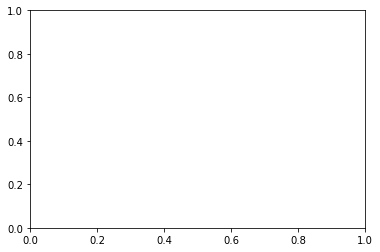

In [49]:
plt.scatter(x=unsup_model['AGE'], y=(unsup_model["RISK_LEVEL"]), c=unsup_model['class'])


plt.ylabel('RISK LEVEL')
plt.title("Machine Learning Clusters vs. Risk Level")
plt.savefig('risk_clusters.png')
plt.show()


In [ ]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model["INCOME_LEVEL"], c=tsne_df['class'])


plt.show()


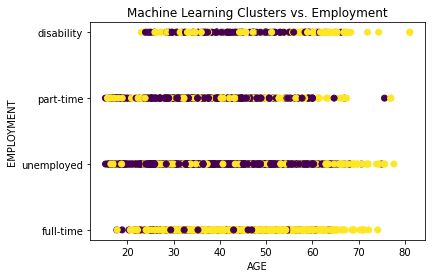

In [40]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model["EMPLOY_CAT"], c=tsne_df['class'])

plt.xlabel('AGE')
plt.ylabel('EMPLOYMENT')
plt.title("Machine Learning Clusters vs. Employment")
plt.savefig('employment_clusters.png')
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

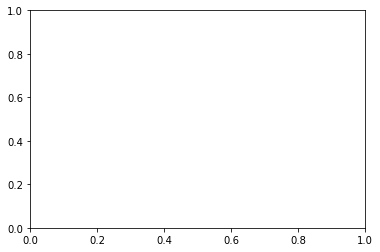

In [51]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model['RISK_LEVEL'], c=tsne_df['class'])

plt.xlabel('AGE')
plt.ylabel('RISK_LEVEL')
plt.title("Machine Learning Clusters vs. Employment")
plt.savefig('employment_clusters.png')
plt.show()

In [ ]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model["ACCEPTANCE_TYPE"], c=tsne_df['class'])

plt.show()

In [ ]:
plt.scatter(x=unsup_model['AGE'], y=unsup_model["GENDER"], c=tsne_df['class'])

plt.show()

In [ ]:
plt.scatter(x=unsup_model['No_HEARING'], y=unsup_model["No_TREATMENTS"], c=tsne_df['class'])

plt.show()

In [ ]:
sup_model=unsup_model.drop(columns = 'class')
sup_model.head(5)


In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(sup_model, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

In [ ]:
# Convert categorical data to numeric and separate target feature for testing data
y_test = testing_data["GRADUATED"]
X_test = testing_data.drop(columns = ["GRADUATED"])
X_test = pd.get_dummies(X_test)
X_test.head()


In [ ]:
# Convert categorical data to numeric and separate target feature for training data
y_train = training_data["GRADUATED"]
X_train = training_data.drop(columns = ["GRADUATED"])
X_train = pd.get_dummies(X_train)
X_train.head()

In [ ]:
# add missing dummy variables to testing set
for i in X_train.columns:
    if i not in X_test.columns:
        X_test[i] = 0

X_test.head()

In [ ]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
# Train a Random Forest Classifier model and print the model score
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

In [ ]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

In [ ]:
# Train a Random Forest Classifier model on the scaled data and print the model score
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_train_scaled, y_train, random_state=42)
clf_scaled = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf_scaled.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf_scaled.score(X_test_scaled, y_test)}')

In [ ]:
#Import important features dependency
feature_importances = clf.feature_importances_

In [ ]:
#Identify the important features

%matplotlib inline
from matplotlib import pyplot as plt

features = sorted(zip(X_test.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()


In [ ]:
#Select important features from training data

from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

In [ ]:
#Train, test, split the selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
#Run logistic regression on selected features
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

In [ ]:
#Run RandomForestClassifier on selected features
X_selected_train_scaled, X_selected_test_scaled, y_train, y_test = train_test_split(X_selected_train_scaled, y_train, random_state=42)
clf_scaled = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf_scaled.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf_scaled.score(X_selected_test_scaled, y_test)}')